In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
train_data = pd.read_csv('train_wbcd.csv')
test_data = pd.read_csv('test_wbcd.csv')

In [2]:
train_data.head()

,Patient_ID,Diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,909410,B,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,...,14.91,19.31,96.53,688.9,0.10340,0.1017,0.06260,0.08216,0.2136,0.06710
1,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.40000,0.16250,0.2364,0.07678
2,8912284,B,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,...,13.90,19.69,92.12,595.6,0.09926,0.2317,0.33440,0.10170,0.1999,0.07127
3,90317302,B,10.26,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,...,11.38,15.65,73.23,394.5,0.13430,0.1650,0.08615,0.06696,0.2937,0.07722
4,914102,B,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,...,14.50,28.46,95.29,648.3,0.11180,0.1646,0.07698,0.04195,0.2687,0.07429


In [3]:
# logistic regression
# separate the training and testing data into features and target
from sklearn import preprocessing
le = preprocessing.LabelEncoder() # encode the target variable into 0 and 1
train_data = train_data.dropna() # drop the missing values from the training data
test_data = test_data.dropna() # drop the missing values from the testing data

In [4]:
# encode "diagnosis" into 0 and 1 which are numerical values
train_data['Diagnosis'] = le.fit_transform(train_data['Diagnosis'].values)
test_data['Diagnosis'] = le.fit_transform(test_data['Diagnosis'].values)


In [5]:
X_train = train_data.iloc[:,2:]
y_train = train_data.iloc[:,1]
X_test = test_data.iloc[:,2:]
y_test = test_data.iloc[:,1]
print("Training data shape: ", train_data.shape)
print("Testing data shape: ", test_data.shape)

Training data shape:  (98, 32)
Testing data shape:  (19, 32)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lambda_val = 0.1

# initialize the model with l2 penalty
lr = LogisticRegression(C=1/lambda_val, penalty='l2', solver='liblinear')

# fit the model with training data
lr.fit(X_train, y_train)

# predict the target on the test dataset
y_pred = lr.predict(X_test)

In [7]:
# get the accuracy score
model_accuracy = accuracy_score(y_pred, y_test)

In [8]:
print("Logistic Regression Accuracy: ", model_accuracy)

Logistic Regression Accuracy:  0.8421052631578947


In [9]:
# print the coefficients
import numpy as np
print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))

Model Coeff: [-0.29550992 -2.08883317 -0.01647266 -1.97903515  0.14495723  0.05112243
  0.27111072  0.37987861  0.16091352  0.09647759  0.00795844 -0.09540808
 -0.67031819  0.37678904 -0.16403507  0.00523747  0.05725272  0.08436866
  0.02252424  0.00417403  0.00539165 -2.52238372  1.0653518   1.20671877
  0.01172741  0.08952068  0.73674168  0.93906759  0.30651603  0.16734447
  0.05041202]


In [10]:
def runLrModel(trials, data, label, penalty_type, penalty_score):
    model_accuracy = 0
    model_weights = np.zeros([1,31])

    for i in range(0, trials):
        Dtrain, Dtest = train_test_split(train_data, test_size=0.3) # split the data into training and testing data
        lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type, solver='liblinear')
        lr.fit(Dtrain.iloc[:,2:], Dtrain[label])
        y_pred = lr.predict(Dtest.iloc[:,2:])
        model_accuracy += accuracy_score(y_pred, Dtest[label])
        model_weights += np.append(lr.intercept_, lr.coef_)

    model_accuracy /= trials
    model_weights /= trials

    return np.round(model_accuracy, decimals=2), np.round(model_weights, decimals=2)

In [11]:
# use the function above to find the best lambda value from 500 random splits of our data
lamda_values = [.0001,.0003,.001,.003,.01,.03,.1,.3,1,3,5,10]
uracy = np.zeros(len(lamda_values))
index = 0

In [12]:
# l2 regularization
for lamda in lamda_values:
    uracy[index], w = runLrModel(500, train_data, 'Diagnosis', 'l2', lamda)
    index += 1

In [13]:
print("Acc: {}".format(uracy))
# penalty at which validation accuracy is maximum
max_index_l2  = np.argmax(uracy)
best_lambda = lamda_values[max_index_l2]
print("Best Lambda: {}".format(best_lambda))

Acc: [0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.94 0.94 0.93 0.92]
Best Lambda: 0.0001


In [14]:
# find best alpha value from 500 random splits of our data
alpha_values = [.0001,.0003,.001,.003,.01,.03,.1,.3,1,3,5,10]
l1_accuracy = np.zeros(len(alpha_values))
index = 0

# l1 regularization
for alpha in alpha_values:
    l1_accuracy[index], w = runLrModel(500, train_data, 'Diagnosis', 'l1', np.float(alpha))
    index += 1

C:\Users\pkmaz\AppData\Local\Temp\ipykernel_24144\719617251.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  l1_accuracy[index], w = runLrModel(500, train_data, 'Diagnosis', 'l1', np.float(alpha))
C:\Users\pkmaz\AppData\Local\Temp\ipykernel_24144\719617251.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  l1_accuracy[index], w = runL

In [15]:
print("Acc: {}".format(l1_accuracy))
# penalty at which validation accuracy is maximum


Acc: [0.95 0.95 0.96 0.96 0.96 0.96 0.96 0.96 0.93 0.92 0.92 0.91]


In [16]:
max_index_l1  = np.argmax(l1_accuracy)
best_alpha = alpha_values[max_index_l1]
print("Best Alpha: {}".format(best_alpha))

Best Alpha: 0.001


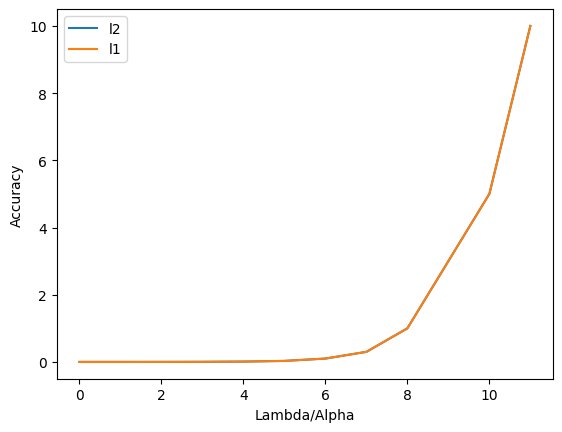

In [18]:
#plot the accuracy curve
import matplotlib.pyplot as plt
plt.plot(lamda_values, label='l2')
plt.plot(alpha_values, label='l1')
plt.xlabel('Lambda/Alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()